# **Simple Linear Regression Using `Statsmodels` and `SKLearn`**

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [260]:
!pip install -q -U watermark

In [262]:
%reload_ext watermark
%watermark -a "Omkar Amale"

Author: Omkar Amale



In [72]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [86]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
import sklearn

In [15]:
# read the data
advertising=pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [17]:
advertising.shape

(200, 4)

In [21]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns

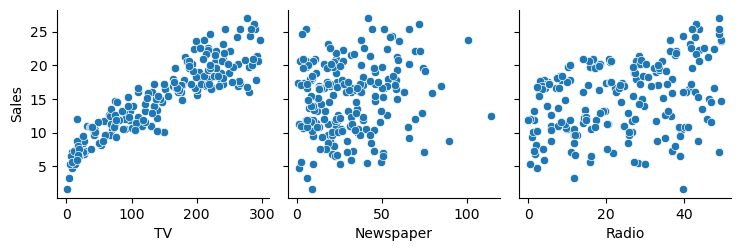

In [47]:
sns.pairplot(data=advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales')
plt.show()

In [49]:
# sns.regplot(x='TV',y='Sales',data=advertising)

In [51]:
# sns.regplot(x='Radio',y='Sales',data=advertising)

In [53]:
# sns.regplot(x='Newspaper',y='Sales',data=advertising)

In [55]:
# to see correlation
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

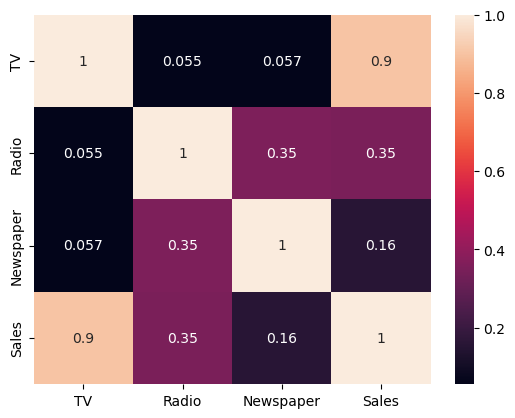

In [59]:
#visualize
sns.heatmap(advertising.corr(),annot=True)

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

#### Steps :
- create X and y
- create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate model (training set, test set)

In [82]:
# create X and Y
X = advertising['TV']
y = advertising['Sales']

In [88]:
# train-test split
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70, random_state=100)

In [104]:
# checking shape of all variables one by one
y_train.shape

(140,)

**statsmodels library does not include constant(intercept) by default in model we need to add it explicitly**

In [113]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [123]:
# fitting the model
# OLS oridinary Least Square
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
# Sales = 6.94 + 0.05*TV (sample of model)

In [120]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.52e-52
Time:                        10:53:02   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **P>|t| value shows statistical significance if low then parameter is significant and vice versa**
- **R-squared value of 81 percent shows 81 percent variation in sales explained by TV (correlation)**
- **p(F-statistic) shows fit is not by chance and significant**

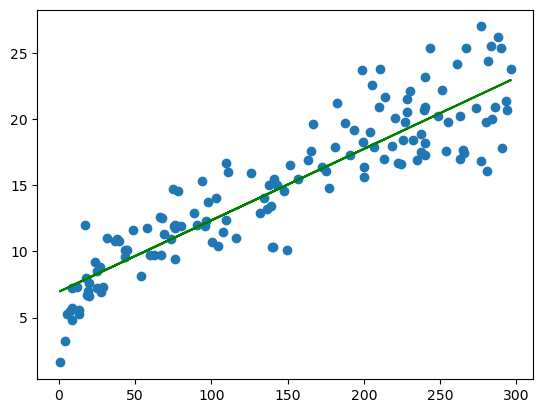

In [140]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948 + 0.054*X_train,'g')

## Step 3: Residual Analysis

In [ ]:
# error =  f(y_train, y_train_pred) assumsion is error term is normally distributed

In [145]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [147]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

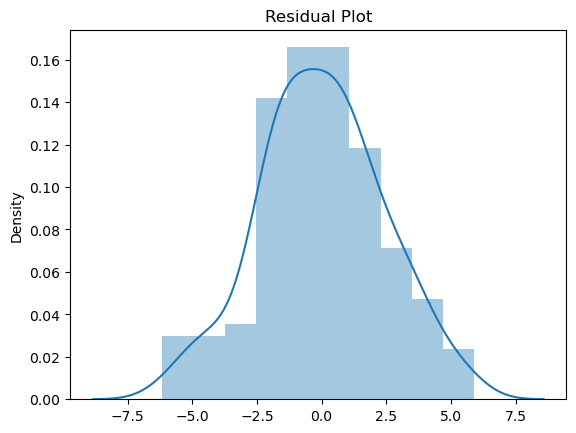

In [151]:
# plot the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

**Residual plot following normal distribution with mean 0 we can say fundamental assumption is respected with model**

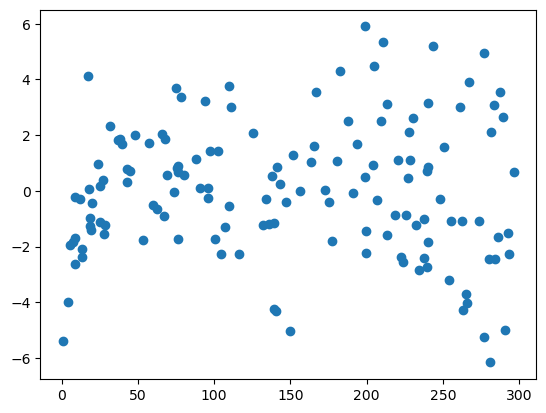

In [159]:
# look for patterns in residuals (we should not be able to identify)
plt.scatter(X_train,res)
plt.show()

**All this residuals are distributed with mean 0 there is no cluster we can say that model is good**
in later state of plot variance is high (right side of 150)

## Step 4: Predictions and Evaluation on the Test Set

In [166]:
# predictions on the test set (y_test_pred)

In [170]:
# add a cons/intercept to test
X_test_sm = sm.add_constant(X_test)

# prediction on test 
y_test_pred = lr_model.predict(X_test_sm)

In [172]:
# evaluate the model, r-squared, on the test

In [176]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [178]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [182]:
# r2 on train
r2 = r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8157933136480389

**Anything within 5 percent is good model**

In [186]:
# mean squared error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

In [188]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred)

5.752400386486836

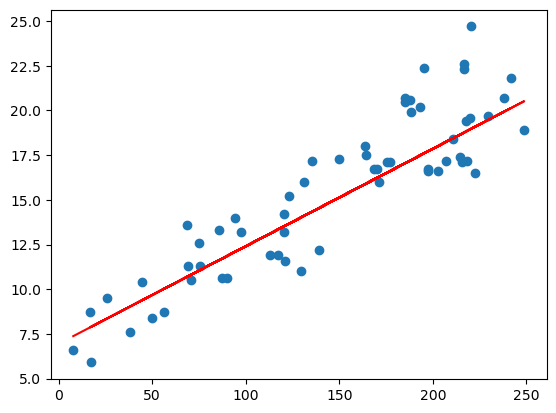

In [192]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

 ### END using Statsmodel library 
 ----


# **Linear Regression using `SKLearn`**

In [217]:
from sklearn.linear_model import LinearRegression

In [233]:
# reshape X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

(60, 1)

In [237]:
# steps in sklearn model building
# 1. create an object of linear regression
lm = LinearRegression()
# 2. fit the model
lm.fit(X_train_lm, y_train)


LinearRegression()

In [243]:
# 3. see the params, make predictions(train, test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.9486832000013585


In [251]:
# make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [249]:
# 4. evaluate
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480388
0.7921031601245658


 ### END using SKLearn library 
 ----

In [264]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 4
Architecture: 64bit



In [266]:
%watermark --iversions

statsmodels: 0.14.2
json       : 2.0.9
IPython    : 8.27.0
xarray     : 2023.6.0
numpy      : 1.26.4
sys        : 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
matplotlib : 3.9.2
seaborn    : 0.13.2
pandas     : 2.2.2
sklearn    : 1.5.1
ipywidgets : 7.8.1

